In [369]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulation d'un augmentorium :

## Première approche : Uniquement l'insecte ravageur **sans adimensionalisation** 

On va considérer le système suivant :  
$$ 
\left\{\begin{array}{1}
\dot x = r_xx(1-\frac{x}{K_x})-mx+fy\\
\dot y = r_yy(1-\frac{y}{K_y})+mx-fy
\end{array}\right.
$$

avec $ \dot x $ la population de ravageurs dans le verger et $ \dot y $ celle dans l'augmentorium.  
$ m $ est alors le taux de fruit mis dans l'augmentorium et $ f $ le taux de fuite des ravageurs, de l'augmentorium vers le verger.


### Dynamique : 

Text(0.5, 1.0, 'Config 2')

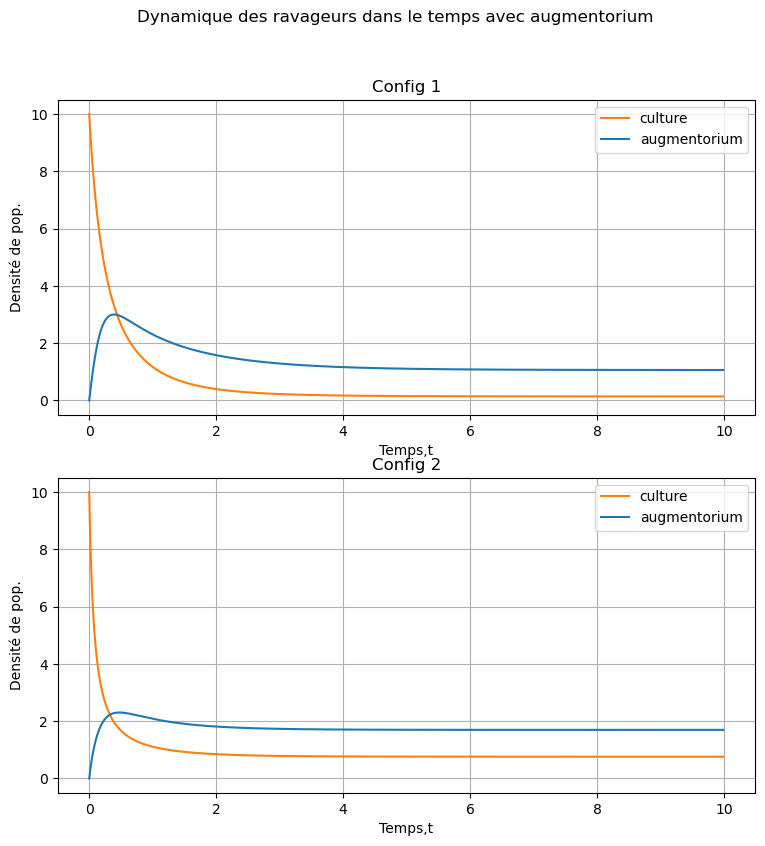

In [418]:
# Définition du modèle :
def aug(etat,t,param):
    rx,ry,Kx,Ky,m,f=param
    x,y=etat
    s=[rx*x*(1-x/Kx)-m*x+f*y,ry*y*(1-y/Ky)+m*x-f*y]
    return s 

# Temps d'intégration
ti = np.arange(0,10,0.01)

# Etats initiaux
x0=10
y0=0
e0=[x0,y0]

# Paramètres 1
rx1=0.5
ry1=1
Kx1=2
Ky1=1
m1=2
f1=0.2

param_aug1=np.array([rx1,ry1,Kx1,Ky1,m1,f1])

#Paramètres 2
rx2=2.5
ry2=1
Kx2=2
Ky2=1
m2=2
f2=0.2

param_aug2=np.array([rx2,ry2,Kx2,Ky2,m2,f2])

# Simulation avec r variable
s1=odeint(aug,e0,ti,args=(param_aug1,))
s2=odeint(aug,e0,ti,args=(param_aug2,))

## Dessin de la dynamique de a population avec param 1:
fig,(ax,ax1)=plt.subplots(2,1,figsize=(9,9))
fig.suptitle('Dynamique des ravageurs dans le temps avec augmentorium')
ax.set_title('Config 1')
ax.plot(ti,s1[:,0],color='C1',label='culture')
ax.plot(ti,s1[:,1],color='C0',label='augmentorium')
ax.grid()
ax.legend()
ax.set_xlabel('Temps,t')
ax.set_ylabel('Densité de pop.')

# Dessin de la dynamique de a population avec param 2:
ax1.plot(ti,s2[:,0],color='C1',label='culture')
ax1.plot(ti,s2[:,1],color='C0',label='augmentorium')
ax1.grid()
ax1.legend()
ax1.set_xlabel('Temps,t')
ax1.set_ylabel('Densité de pop.')
ax1.set_title('Config 2')



La baisse des ravageurs dans le verger est significative.

### Plan de phase :

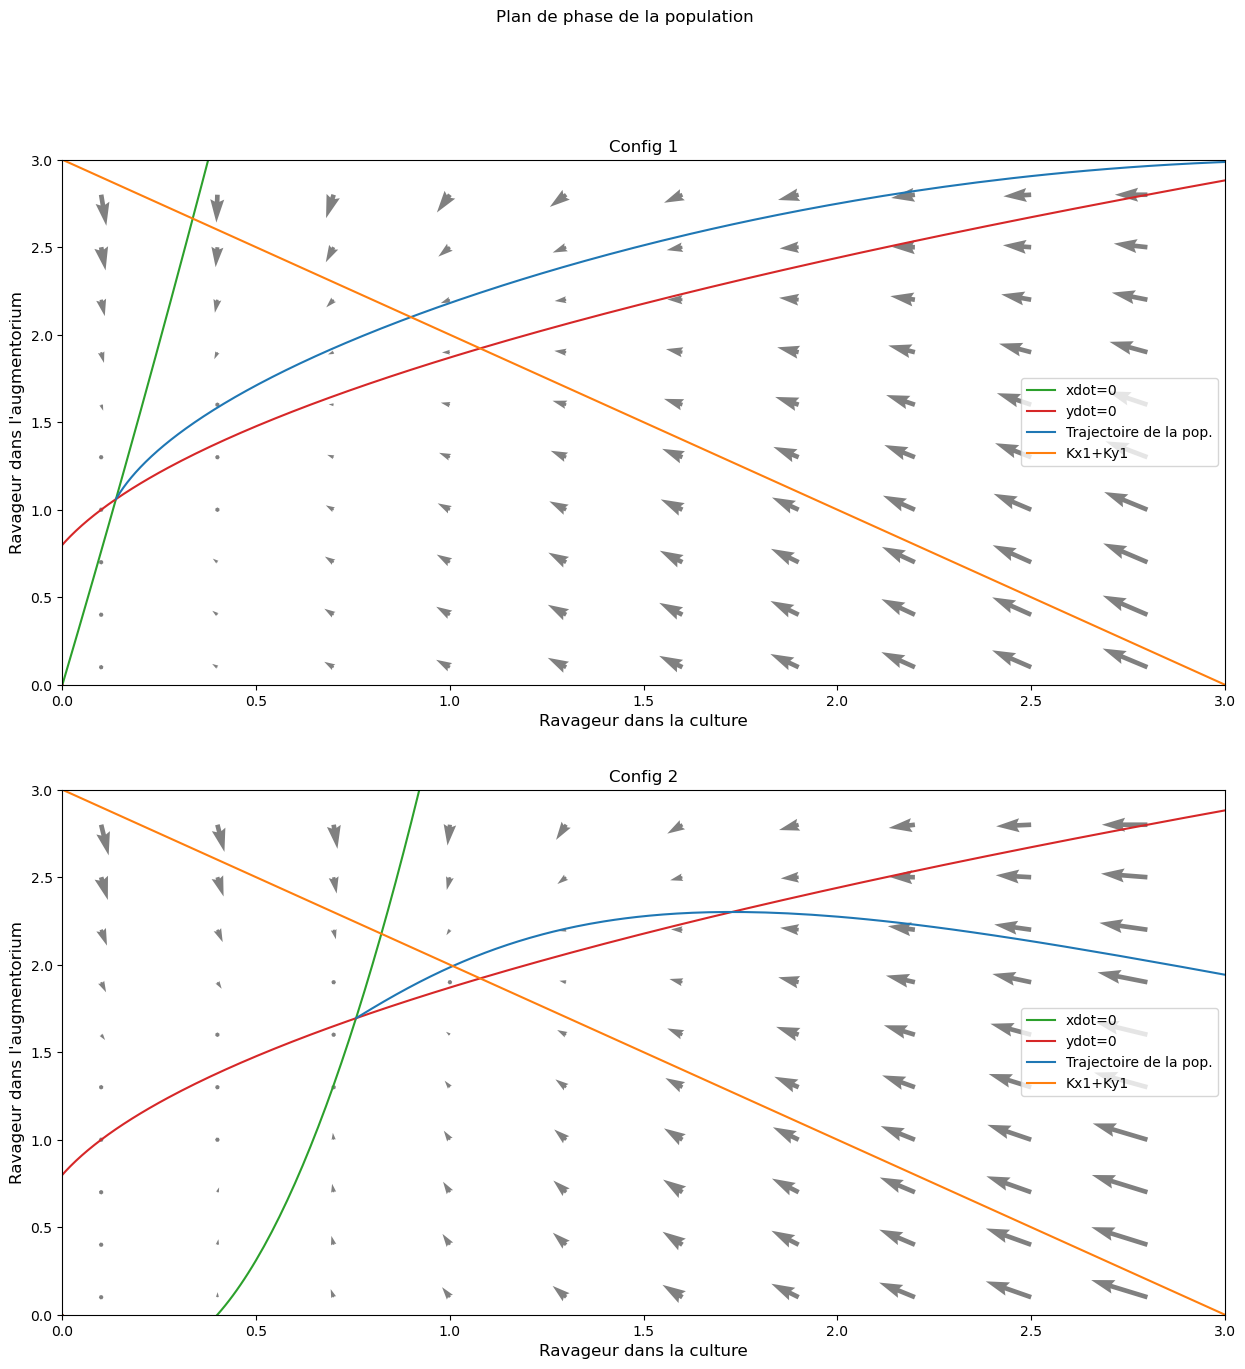

In [419]:
fig2,(ax2,ax3)=plt.subplots(2,1,figsize=(15,15))
fig2.suptitle('Plan de phase de la population')
ax2.set_title('Config 1')
ax3.set_title('Config 2')

#Plan de phase 1:

# Isocline nulles
#xdot = 0 --> y=x*1/f*(r(x/Kx-1)+m)
xt=np.arange(0,10,0.01)
ax2.plot(xt,xt*(1/f1)*(rx1*((xt/Kx1)-1)+m1),color='C2',label='xdot=0')
#ydot = 0 --> x=y*1/m*(r(y/Ky-1)+f)
yt=np.arange(0,10,0.01)
ax2.plot(yt*(1/m1)*(ry1*((yt/Ky1)-1)+f1),yt,color='C3',label='ydot=0')

ax2.set_xlim(left=0,right=3)
ax2.set_ylim(top=3,bottom=0)
ax2.plot(s1[:,0],s1[:,1],label='Trajectoire de la pop.')
ax2.set_xlabel('Ravageur dans la culture',fontsize='12')
ax2.set_ylabel('Ravageur dans l\'augmentorium',fontsize='12')

# Ajout du champ de vecteur
xg=np.arange(-0.5,3,0.3)
yg=np.arange(-0.5,3,0.3)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug1)
ax2.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=200,width=0.004)


#Plan de phase avec les paramètres 2 

# Isocline nulles
#xdot = 0 --> y=x*1/f*(r(x/Kx-1)+m)
xt=np.arange(0,10,0.01)
ax3.plot(xt,xt*(1/f2)*(rx2*((xt/Kx2)-1)+m2),color='C2',label='xdot=0')
#ydot = 0 --> x=y*1/m*(r(y/Ky-1)+f)
yt=np.arange(0,10,0.01)
ax3.plot(yt*(1/m2)*(ry2*((yt/Ky2)-1)+f2),yt,color='C3',label='ydot=0')

ax3.set_xlim(left=0,right=3)
ax3.set_ylim(top=3,bottom=0)
ax3.plot(s2[:,0],s2[:,1],label='Trajectoire de la pop.')
ax3.set_xlabel('Ravageur dans la culture',fontsize='12')
ax3.set_ylabel('Ravageur dans l\'augmentorium',fontsize='12')

# Ajout du champ de vecteur
xg=np.arange(-0.5,3,0.3)
yg=np.arange(-0.5,3,0.3)
X,Y=np.meshgrid(xg,yg)

dx,dy=aug([X,Y],0,param_aug2)
ax3.quiver(X,Y,dx,dy,angles='xy',color='grey',scale=200,width=0.004)


x=np.arange(0,10,0.01)
ax3.plot(x,-x+Kx1+Ky1,label='Kx1+Ky1')
ax2.plot(x,-x+Kx1+Ky1,label='Kx1+Ky1')
ax3.legend()
ax2.legend()

On observe deux équilibres, **(0,0)** qui est instable et **(x*,y*)** qui est **stable** (par le champ de vecteurs). Ceci montre que la population tend à se stabiliser entre l'augmentorium et l'extérieur. Dans ce modèle on a jamais disparition du ravageur. En fonction de son taux de reproduction dans le verger on a pas forcément le même équilibre, la trajectoire pour y arriver n'est pas non plus la même.

Si le **taux de migration n'est pas le même**, ie qu'on séquestre les ravageurs dans l'augmentorium alors, si le taux de croissance dans les cultures est faible, il y a un **équilibre avec peu de ravageurs en culture** (deux fois moins que pour un taux de reproduction fort) atteint pour un faible taux de ravageur dans l'augmentorium. C'est ce qui peut se passer si on inclut la **présence de parasites** qui viennent augmenter la mortalité des ravageurs dans la culture et qui se reproduisent. 

Ainsi les mesures prophylactiques de séquestration des fruits infestés sont dans tous les cas **efficaces** pour réduire l'infestation. Couplées à la libération de parasites elles peuvent encore être améliorée.